In [1]:
import pandas as pd
from eval_module import ICDEvaluator
import ast

# Load your data
df = pd.read_csv("test_run_with_confidence_flash2-5_v2.csv")  # Replace with your actual file path
evaluator = ICDEvaluator(df)
index = 3
df.columns

Index(['encounter_id', 'age', 'age_unit', 'sex', 'visit_reason',
       'reference_answer', 'transcript', 'entries', 'confidence_summary',
       'cleaned_transcript'],
      dtype='object')

In [2]:
df.transcript.iloc[index]

"I'm in after his birthday for his checkup with grandma. I'm like, we haven't done a checkup since he was six. I know. And I didn't want to talk about vaccines, though I did text Alex and say, do you want him to get a flu shot and COVID if he can get it? Yeah. If he can see we're here. Yeah, he can. I mean. Yeah. He was enrolled in every vaccine trial there ever was because his dad is an infectious disease killer.\n\nYeah. But I don't know what this whole generation, are you that generation that just... But, you know, since he gave me a letter that I can make a medical decision that he can get me together. I mean, why not? Exactly. Especially a flu shot. 100%. Tis the season. But then, yes, come after your birthday. come for your 10-year checkup. Once a year? Just come once a year? You don't just come? Yeah, you come once a year for a checkup. Yes. There's other issues. Exactly. I mean, it's nice when there's not, but you know, we still like to do what's going on with you. Yeah. So wha

In [3]:
for d in ast.literal_eval(df.entries.iloc[index]):
    print(d["icd10_code"], d["icd10_condition_name"],d["confidence"], d["confidence_reasoning"])

J45.901 Unspecified asthma with (acute) exacerbation confident The transcript provides strong evidence for an asthma exacerbation, including wheezing on exam, exertional dyspnea, history of reactive airway disease, and acute treatment with Albuterol and Prednisone. The 'unspecified' and 'exacerbation' components of the code are well-supported.
R05.3 Chronic cough requires_human_review While 'chronic cough' is explicitly mentioned, it is also a primary symptom of asthma. Per coding guidelines, symptoms integral to a confirmed diagnosis are generally not coded separately. It is debatable whether the 'chronic' nature makes it significant enough to report in addition to the asthma exacerbation. This requires a second opinion.
Z77.098 Contact with and (suspected) exposure to other hazardous, chiefly nonmedicinal, chemicals confident The transcript explicitly identifies regular exposure to chlorine as an environmental irritant contributing to the patient's condition. This Z-code accurately c

In [4]:
# print(df.cleaned_transcript.iloc[index])
print(df.reference_answer.iloc[index])

J98.8 Wheezing-associated respiratory infection (WARI)
Z23 Encounter for immunization
J45.990 Exercise-induced RAD (reactive airway disease)


EXACT MATCH EVALUATION RESULTS
Average Precision: 0.296
Average Recall: 0.510
Average F1 Score: 0.350
Processed Examples: 32
Empty Examples: 1


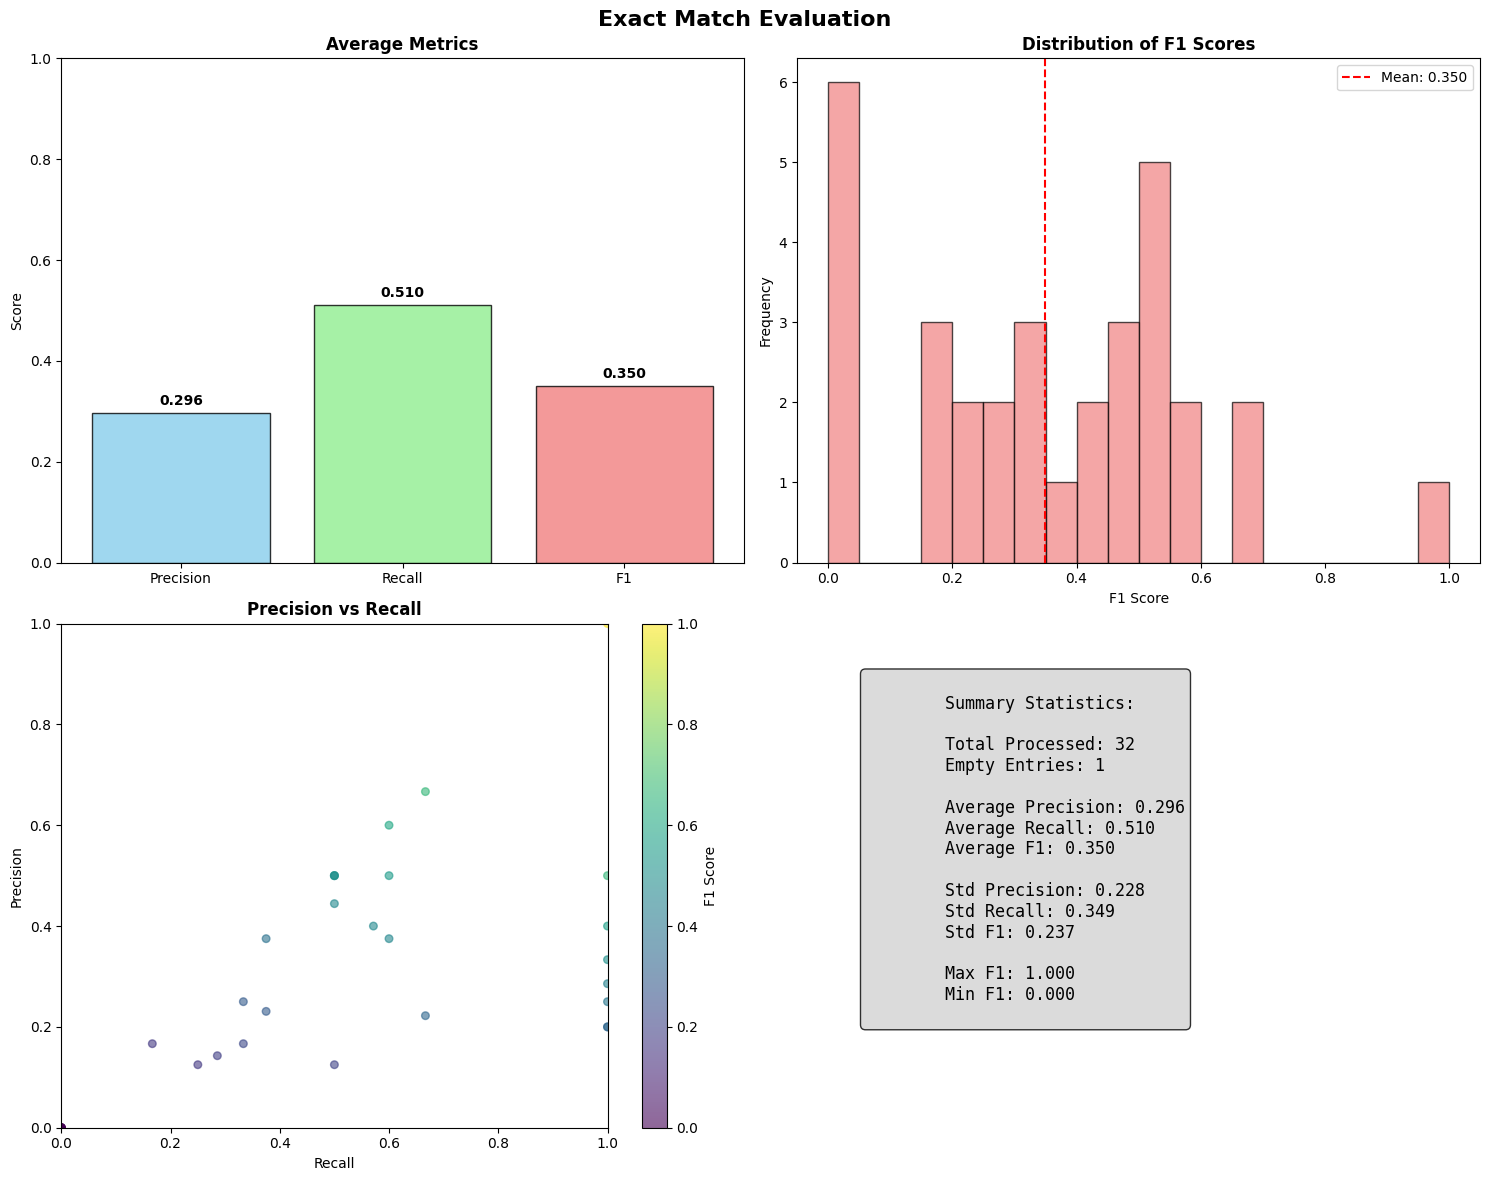

In [5]:
# Perform exact match evaluation
exact_results = evaluator.evaluate_per_prediction()

print("EXACT MATCH EVALUATION RESULTS")
print("="*50)
print(f"Average Precision: {exact_results['avg_precision']:.3f}")
print(f"Average Recall: {exact_results['avg_recall']:.3f}")
print(f"Average F1 Score: {exact_results['avg_f1']:.3f}")
print(f"Processed Examples: {exact_results['processed_count']}")
print(f"Empty Examples: {exact_results['empty_count']}")

# Plot the results
evaluator.plot_evaluation_results(exact_results, "Exact Match Evaluation")

TOP 10 MOST FREQUENT ICD CODES PERFORMANCE

PERFORMANCE INSIGHTS FOR MOST FREQUENT ICD CATEGORIES

Key Observations:
• 5/10 categories show perfect precision (1.000)
• 1/10 categories show zero performance across all metrics
• 0/10 categories show recall > 1.0 (model over-predicting)
• Best performing category: F90.9 (F1: 1.000)
• Worst performing category: Z00.121 (F1: 0.000)
• Top 10 categories represent 33 total occurrences
• Most frequent: I10 (5 occurrences)
• Least frequent in top 10: F90.9 (2 occurrences)


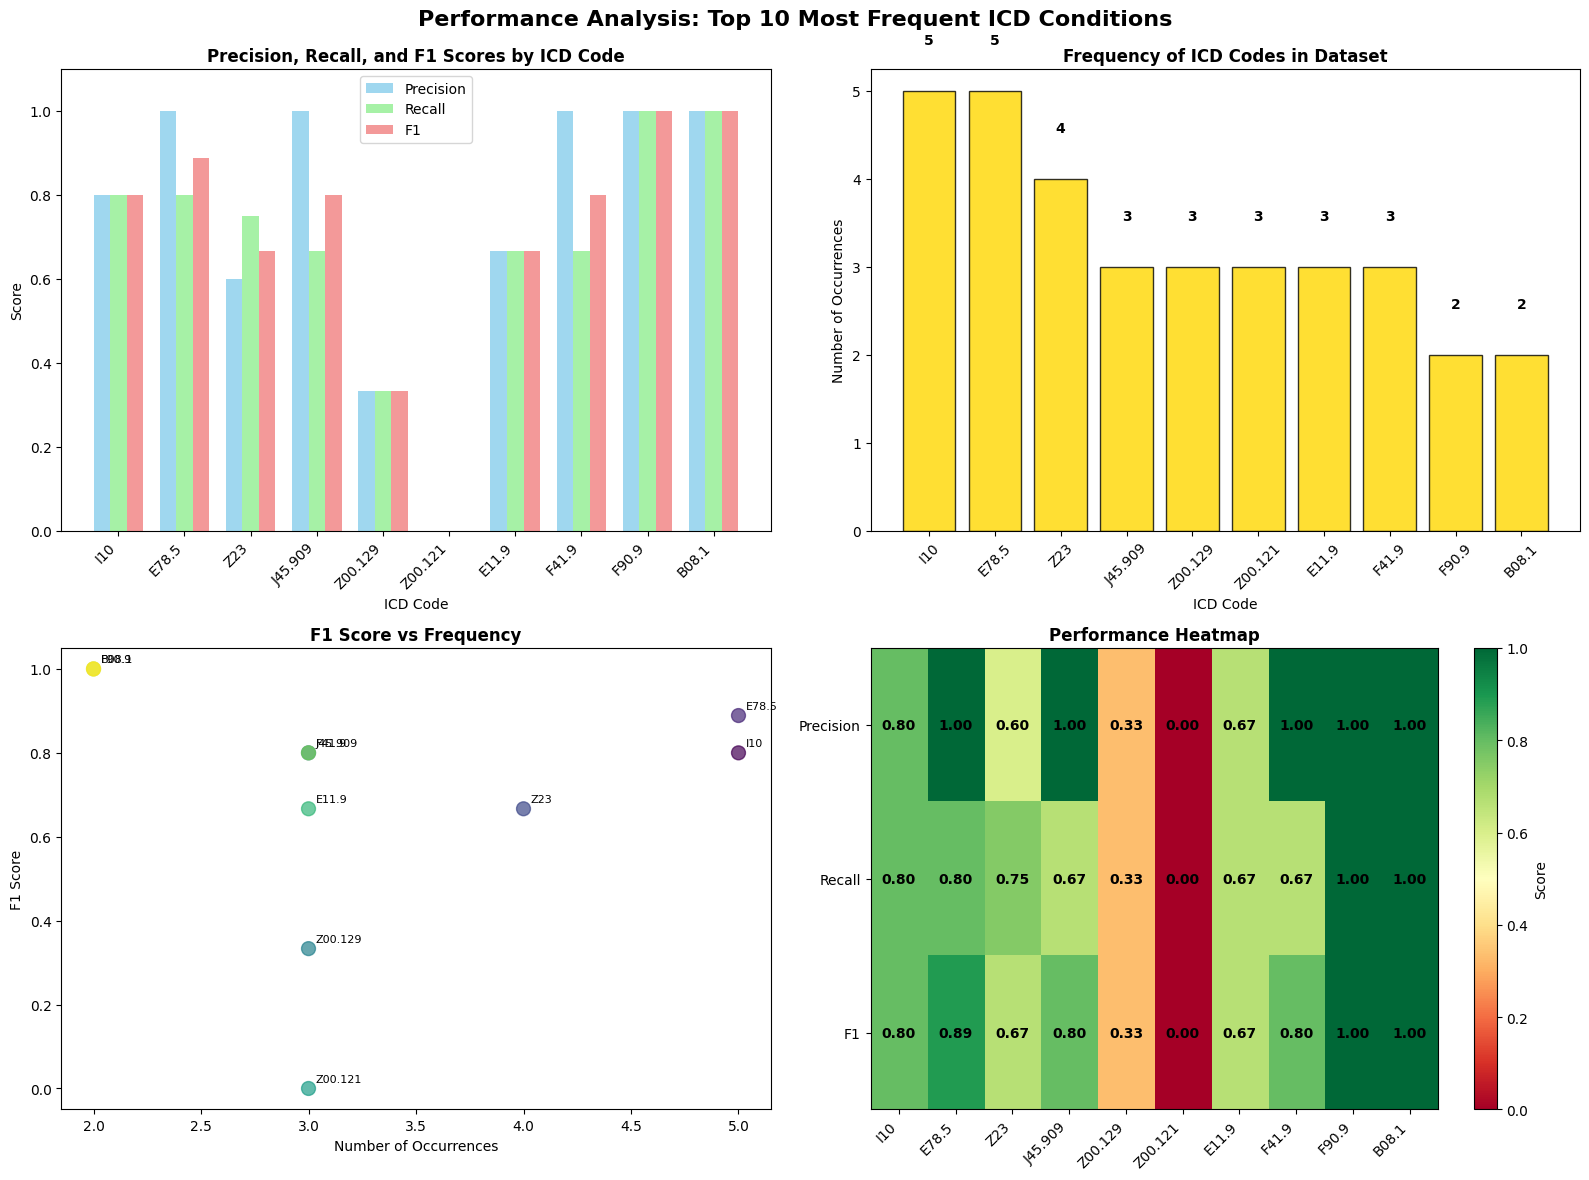

In [6]:
# Evaluate performance on top frequent ICD codes
top_conditions_results = evaluator.evaluate_top_frequent_conditions(top_k=10)

print("TOP 10 MOST FREQUENT ICD CODES PERFORMANCE")
print("="*60)

# Print detailed analysis
evaluator.print_top_conditions_analysis(top_conditions_results, top_k=10)

# Plot the results
evaluator.plot_top_frequent_conditions_scores(top_conditions_results, top_k=10)

In [7]:
# Analyze specific examples by index
example_indices = [0, 5, 10, 15, 20]  # Adjust these indices as needed

for idx in example_indices:
    analysis = evaluator.analyze_example_by_index(idx)
    evaluator.print_example_analysis(analysis)
    print("\n" + "-"*80 + "\n")


DETAILED ANALYSIS FOR EXAMPLE 0

Predicted Codes (8): ['E11.65', 'E11.51', 'E11.42', 'I10', 'E78.5', 'E66.812', 'E11.628', 'Z91.141']
Reference Codes (8): ['I10', 'M79.605', 'M79.604', 'E78.5', 'E66.812', 'E11.29', 'E61.1', 'E53.8']

--- EXACT MATCH EVALUATION ---
Precision: 0.375
Recall: 0.375
F1 Score: 0.375
Correctly Predicted: ['I10', 'E78.5', 'E66.812']
Missed (False Negatives): ['E11.29', 'M79.605', 'E53.8', 'M79.604', 'E61.1']
Extra (False Positives): ['E11.42', 'Z91.141', 'E11.65', 'E11.628', 'E11.51']

--------------------------------------------------------------------------------


DETAILED ANALYSIS FOR EXAMPLE 5

Predicted Codes (5): ['F90.2', 'F91.3', 'R62.51', 'Z00.129', 'Z23']
Reference Codes (1): ['F90.2']

--- EXACT MATCH EVALUATION ---
Precision: 0.200
Recall: 1.000
F1 Score: 0.333
Correctly Predicted: ['F90.2']
Missed (False Negatives): []
Extra (False Positives): ['R62.51', 'Z00.129', 'Z23', 'F91.3']

----------------------------------------------------------------

In [8]:
# Analyze examples containing specific ICD codes
icd_codes_to_analyze = ['I10', 'E11.9', 'Z51.11']  # Replace with codes from your data

for icd_code in icd_codes_to_analyze:
    print(f"\nANALYSIS FOR ICD CODE: {icd_code}")
    print("="*60)
    
    code_analysis = evaluator.analyze_example_by_icd_code(icd_code)
    
    summary = code_analysis['summary']
    print(f"Code in references: {summary['code_in_references']}")
    print(f"Code in predictions: {summary['code_in_predictions']}")
    print(f"Correct predictions: {summary['correct_predictions']}")
    print(f"Precision for this code: {summary['precision_for_code']:.3f}")
    print(f"Recall for this code: {summary['recall_for_code']:.3f}")
    print(f"F1 for this code: {summary['f1_for_code']:.3f}")
    
    print(f"\nTotal examples found: {code_analysis['total_examples_found']}")
    
    # Show first few examples
    if code_analysis['examples']:
        print("\nFirst 3 examples:")
        for i, example in enumerate(code_analysis['examples'][:3]):
            print(f"  Example {i+1} (Index {example['index']}):")
            print(f"    Predicted: {example['predicted_codes']}")
            print(f"    Reference: {example['reference_codes']}")
            print(f"    Code in prediction: {example['code_in_prediction']}")
            print(f"    Code in reference: {example['code_in_reference']}")
            print(f"    Correctly predicted: {example['code_correctly_predicted']}")


ANALYSIS FOR ICD CODE: I10
Code in references: 5
Code in predictions: 5
Correct predictions: 4
Precision for this code: 0.800
Recall for this code: 0.800
F1 for this code: 0.800

Total examples found: 6

First 3 examples:
  Example 1 (Index 0):
    Predicted: ['E11.65', 'E11.51', 'E11.42', 'I10', 'E78.5', 'E66.812', 'E11.628', 'Z91.141']
    Reference: ['I10', 'M79.605', 'M79.604', 'E78.5', 'E66.812', 'E11.29', 'E61.1', 'E53.8']
    Code in prediction: True
    Code in reference: True
    Correctly predicted: True
  Example 2 (Index 21):
    Predicted: ['I10', 'E11.9', 'I70.213', 'Z95.820', 'Z95.5', 'I25.10', 'Z91.81', 'G89.21']
    Reference: ['I10', 'E78.5', 'I25.10', 'I73.9', 'E11.9']
    Code in prediction: True
    Code in reference: True
    Correctly predicted: True
  Example 3 (Index 23):
    Predicted: ['I10', 'E78.5', 'R73.03', 'Z56.6', 'R94.6']
    Reference: ['I10', 'E78.5', 'E55.9', 'R73.03', 'E07.9']
    Code in prediction: True
    Code in reference: True
    Correctly 

Performing comprehensive confidence evaluation...
Analyzing confidence patterns in predictions...
Analyzing confidence patterns in predictions...
COMPREHENSIVE CONFIDENCE ANALYSIS

PREDICTION-LEVEL ANALYSIS (Individual ICD Code Accuracy)
--------------------------------------------------
Total predictions: 192
Confident predictions: 167
Review predictions: 25
Confident accuracy: 0.305
Review accuracy: 0.040
Overall accuracy: 0.271
Calibration gap: 0.265

ENCOUNTER-LEVEL ANALYSIS (Precision/Recall/F1 per Encounter)
--------------------------------------------------
Total encounters: 32
Confident encounters: 32
Review encounters: 14

Confident Metrics:
  Precision: 0.341
  Recall: 0.494
  F1 Score: 0.376

Review Metrics:
  Precision: 0.036
  Recall: 0.036
  F1 Score: 0.036


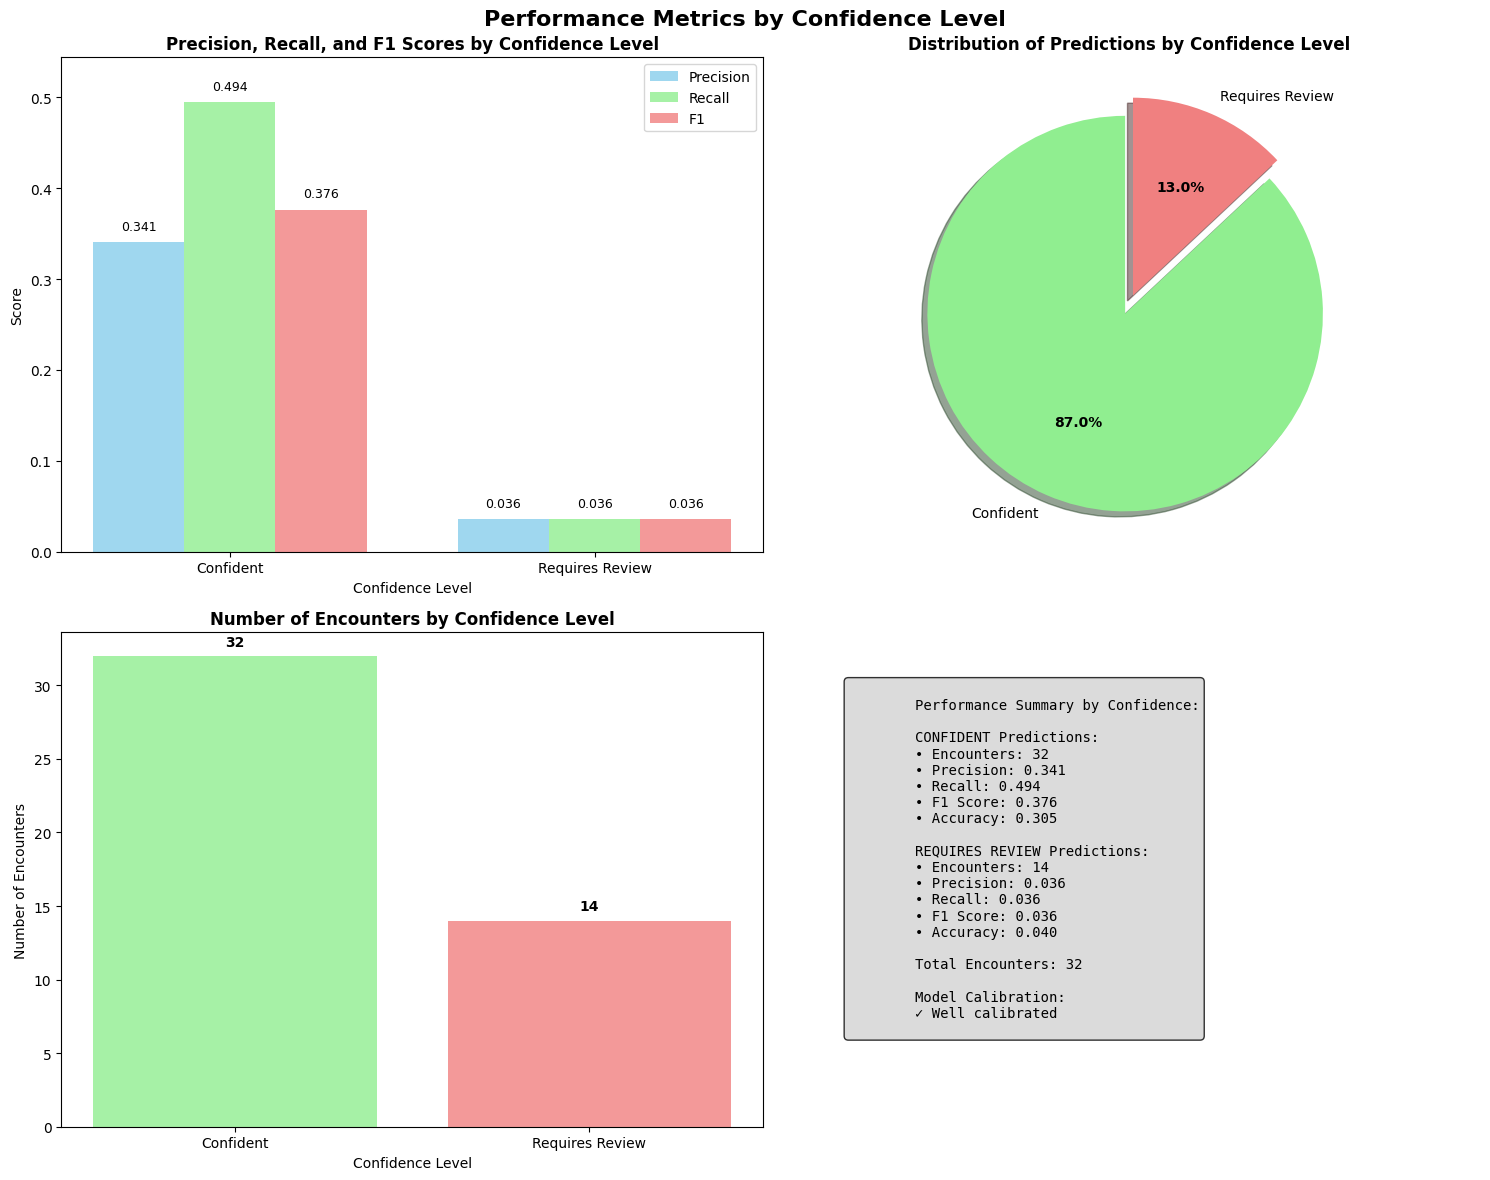

In [9]:
# Comprehensive confidence analysis with corrected calculations
comprehensive_results = evaluator.comprehensive_confidence_evaluation()

if 'error' not in comprehensive_results:
    pred_level = comprehensive_results['prediction_level']
    enc_level = comprehensive_results['encounter_level']
    
    print("COMPREHENSIVE CONFIDENCE ANALYSIS")
    print("="*60)
    
    print("\nPREDICTION-LEVEL ANALYSIS (Individual ICD Code Accuracy)")
    print("-" * 50)
    print(f"Total predictions: {pred_level['total_predictions']}")
    print(f"Confident predictions: {pred_level['confident_predictions']}")
    print(f"Review predictions: {pred_level['review_predictions']}")
    print(f"Confident accuracy: {pred_level['confident_accuracy']:.3f}")
    print(f"Review accuracy: {pred_level['review_accuracy']:.3f}")
    print(f"Overall accuracy: {pred_level['overall_accuracy']:.3f}")
    print(f"Calibration gap: {pred_level['calibration_gap']:.3f}")
    
    print("\nENCOUNTER-LEVEL ANALYSIS (Precision/Recall/F1 per Encounter)")
    print("-" * 50)
    print(f"Total encounters: {enc_level['total_encounters']}")
    print(f"Confident encounters: {enc_level['confident_encounters']}")
    print(f"Review encounters: {enc_level['review_encounters']}")
    
    print(f"\nConfident Metrics:")
    print(f"  Precision: {enc_level['confident_metrics']['precision']:.3f}")
    print(f"  Recall: {enc_level['confident_metrics']['recall']:.3f}")
    print(f"  F1 Score: {enc_level['confident_metrics']['f1']:.3f}")
    
    print(f"\nReview Metrics:")
    print(f"  Precision: {enc_level['review_metrics']['precision']:.3f}")
    print(f"  Recall: {enc_level['review_metrics']['recall']:.3f}")
    print(f"  F1 Score: {enc_level['review_metrics']['f1']:.3f}")
    
    # Use the encounter-level data for plotting precision/recall/F1
    encounter_data = comprehensive_results['raw_data']['encounter_data']
    evaluator.plot_confidence_performance_metrics(encounter_data)
    
else:
    print("No confidence data found in predictions")